# 1. Предсказание цены на недвижимость

In [226]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [227]:
from sklearn.datasets import load_boston

In [228]:
bost = load_boston()

In [229]:
bost.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [230]:
print(bost['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [231]:
print(bost['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [232]:
X = bost.data

In [233]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [234]:
y = bost.target

In [235]:
X, y = load_boston(return_X_y = True)

In [236]:
X.shape

(506, 13)

In [237]:
y.shape

(506,)

In [238]:
# Формирование выборок: разделим данные на 2 части, обучающую и тренировочную

In [239]:
train_share = 0.8
train_size = int(X.shape[0]* train_share)

In [240]:
X.shape[0]* train_share

404.8

In [241]:
X_train = x[:train_size]
X_test = x[train_size:]

In [242]:
X_train.shape

(404, 13)

In [243]:
y_train = y[:train_size]
y_test = y[train_size:]

In [244]:
y_train.shape

(404,)

In [245]:
# или используем готовую функцию train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [246]:
from sklearn.preprocessing import StandardScaler

In [247]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [248]:
# исправляем ошибку ValueError: Unknown label type: 'continuous' для ("Unknown label type: %r" % y_type)

In [249]:
from sklearn import preprocessing
from sklearn import utils

In [250]:
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_train_encoded

array([113,  90, 172, 169, 179, 141, 102, 132,  44,  64,  34,  64,  91,
        79,  57,  74, 104,  52,  77,  57,  25,  71,  36,  31,  39,  27,
        45,  33,  59,  85,  19,  31,  21,  20,  24,  64,  75,  85, 120,
       152, 173, 129, 125, 120,  87,  68,  75,  45,  30,  69,  72,  80,
       122, 107,  64, 176, 120, 157, 106,  71,  62,  41,  95, 122, 165,
       108,  69,  93,  51,  84, 115,  91, 101, 107, 114,  88,  75,  83,
        87,  78, 135, 112, 121, 102, 112, 129,  98,  95, 109, 141,  99,
        93, 102, 122,  81, 138,  88, 187, 195, 167, 133, 128,  61,  68,
        76,  70,  70,  79,  73,  69,  91, 101,  63,  62,  60,  58,  87,
        67,  79,  68,  93,  78,  80,  50,  63,  88,  40,  43,  55,  29,
        67,  71, 103,  59,  39,  56,  51,  48,  22,  54,  28,  30,  23,
        39,  15,  26,  39,  32,  54,  38,  89,  71,  37,  69,  47,  39,
        20, 189, 116, 106, 131, 204, 204, 204, 100, 122, 204, 111, 111,
        96,  51,  66, 104, 109,  99, 144, 105, 119, 147, 183, 18

In [251]:
print(utils.multiclass.type_of_target(y_train))

continuous


In [252]:
print(utils.multiclass.type_of_target(y_train.astype('int')))

multiclass


In [253]:
print(utils.multiclass.type_of_target(y_train_encoded))

multiclass


In [254]:
y_test_encoded = lab_enc.fit_transform(y_test)
y_test_encoded

array([ 7,  0, 20, 77, 46, 76, 37, 46, 50, 41,  1,  2,  3, 13,  9,  6, 43,
       32, 63, 27, 18,  5, 12, 16, 17, 10, 34, 31, 40, 33, 18, 27, 11,  8,
        6, 24, 14, 45, 52, 39, 15, 19, 36, 22, 31, 25, 27, 38, 40, 49, 36,
       31, 23, 28, 36, 59, 42, 48, 55, 61, 65, 58, 53, 54, 54, 60, 58, 56,
       71, 78, 30, 26, 43, 21, 35, 65, 69, 72, 75, 66, 62, 64, 54, 62, 38,
        1,  4, 29, 60, 66, 74, 70, 57, 51, 64, 47, 44, 68, 62, 73, 67, 20])

In [255]:
print(utils.multiclass.type_of_target(y_test))

continuous


In [256]:
print(utils.multiclass.type_of_target(y_test.astype('int')))

multiclass


In [257]:
print(utils.multiclass.type_of_target(y_test_encoded))

multiclass


## cross_val_score для KNN

In [258]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train_encoded, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.00970874 0.01041667 0.         0.         0.         0.14285714
 0.33333333 1.         0.         0.        ]
0.14963158807212204


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [259]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train_encoded, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number 

[0.15719959566154595, 0.14101036180383694, 0.1541093864730358, 0.15159237238584752, 0.14963158807212204, 0.26762100606154005, 0.2713247097652437, 0.25703899547952946, 0.25752443237273337, 0.2585660990394, 0.25808066214619607, 0.2671715712371052, 0.2671715712371052, 0.2676570081303091, 0.2676570081303091, 0.268142445023513, 0.286809700098535, 0.28632426320533116, 0.28632426320533116, 0.2858388263121273, 0.2858388263121273, 0.2868804929787939, 0.2725947786930797, 0.2858388263121273, 0.2858388263121273, 0.2858388263121273, 0.2868804929787939, 0.2868804929787939, 0.2868804929787939, 0.2868804929787939]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Text(0,0.5,'Cross-Validated Accuracy')

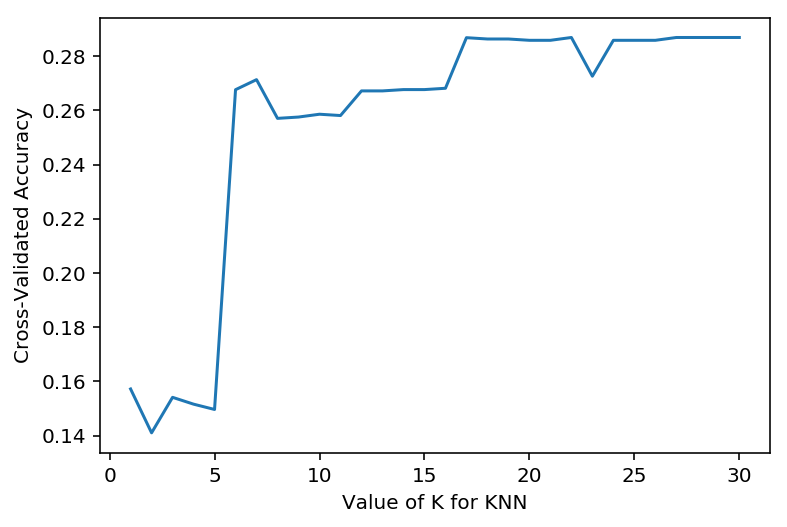

In [260]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [261]:
###

In [262]:
knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'p': [1, 2]
}

In [263]:
knn = KNeighborsClassifier(metric='minkowski')
grid_knn = GridSearchCV(knn, knn_params, scoring='accuracy', cv=10)
grid_knn.fit(X_train, y_train_encoded)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [264]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)

{'n_neighbors': 1, 'p': 2}
0.03712871287128713
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


## GridSearchCV

In [265]:
from sklearn.model_selection import GridSearchCV

In [266]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [267]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [268]:
# instantiate the grid - будет перебирать параметр "количество соседей" у KNN, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [269]:
# fit the grid with data
grid.fit(X_train, y_train_encoded,)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [270]:
# view the complete results 
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0005250215530395508
std_fit_time : 0.00016011217797973296
mean_score_time : 0.0009321689605712891
std_score_time : 0.00048346428467081445
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : 0.019417475728155338
split1_test_score : 0.052083333333333336
split2_test_score : 0.0392156862745098
split3_test_score : 0.037037037037037035
split4_test_score : 0.09090909090909091
split5_test_score : 0.0
split6_test_score : 0.3333333333333333
split7_test_score : 1.0
split8_test_score : 0.0
split9_test_score : 0.0
mean_test_score : 0.03712871287128713
std_test_score : 0.05717929743616323
rank_test_score : 2
split0_train_score : 1.0
split1_train_score : 1.0
split2_train_score : 1.0
split3_train_score : 1.0
split4_train_score : 1.0
split5_train_score : 1.0
split6_train_score : 1.0
split7_train_score : 1.0
split8_train_score : 1.0
split9_train_score : 1.0
mean_train_score : 1.0
std_train_score : 0.0


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

In [271]:
 # create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.03712871 0.01732673 0.01980198 0.01732673 0.01485149 0.02227723
 0.02475248 0.02227723 0.02475248 0.02722772 0.02475248 0.02722772
 0.02722772 0.02970297 0.02970297 0.03217822 0.03960396 0.03712871
 0.03712871 0.03465347 0.03465347 0.03712871 0.03465347 0.03465347
 0.03465347 0.03465347 0.03712871 0.03712871 0.03712871 0.03712871]


Text(0,0.5,'Cross-Validated Accuracy')

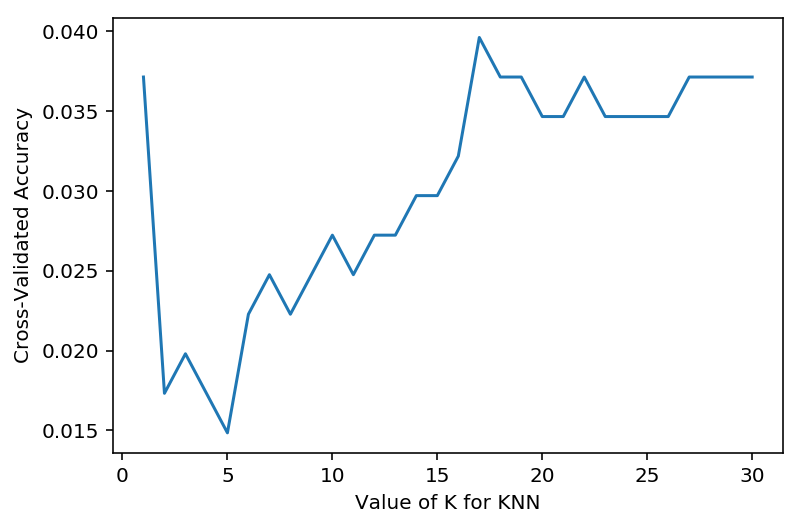

In [272]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [273]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.039603960396039604
{'n_neighbors': 17}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')


## confusion_matrix для лучшего estimator'а

In [276]:
from sklearn.metrics import confusion_matrix

In [277]:
y_pred = grid.best_estimator_.predict(X_test)

In [278]:
confusion_matrix(y_test_encoded, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [279]:
# как-то не очень впечатляюще вышло =(

## OOB Score

In [280]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
classifier = RandomForestClassifier(oob_score=True, n_estimators=20, max_depth=5)

In [282]:
classifier.fit(X_train, y_train_encoded)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [283]:
print(classifier.oob_score_)
print(classifier.score(X_test,y_test_encoded))

0.0297029702970297
0.00980392156862745


In [284]:
#не понимаю почему такой score получается

## LogisticRegression

In [285]:
# Построение регрессии и предсказания по тестовой выборке

In [286]:
from sklearn.linear_model import LogisticRegression

In [287]:
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 0.25, 0.5]
}

In [288]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
grid_lr = GridSearchCV(lr, lr_params, scoring='accuracy', cv=10)
#обучим модель на тренировочной выборке
grid_lr.fit(X_train, y_train_encoded)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 0.25, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [289]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)

{'C': 0.5, 'penalty': 'l1'}
0.06683168316831684
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


## SVM

In [295]:
from sklearn.svm import SVC

In [296]:
svc_params = {
    'C': [0.001, 0.01, 0.1, 0.25, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [297]:
svc = SVC()
grid_svc = GridSearchCV(svc, svc_params, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train_encoded)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 0.25, 0.5], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [298]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)
print(grid_svc.best_estimator_)

{'C': 0.1, 'kernel': 'linear'}
0.04950495049504951
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


## Decision Tree

In [299]:
from sklearn.tree import DecisionTreeClassifier

In [300]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [301]:
tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, tree_params, scoring='accuracy', cv=10)
grid_tree.fit(X_train, y_train_encoded)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 7, 9, None], 'min_samples_leaf': [1, 2, 4, 8, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [302]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)
print(grid_tree.best_estimator_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 16}
0.0594059405940594
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


## RandomForest

In [303]:
from sklearn.ensemble import RandomForestClassifier

In [304]:
forest_params = {
    'n_estimators': [5, 10, 20, 40],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [305]:
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, forest_params, scoring='accuracy', cv=10, n_jobs=-1)
grid_forest.fit(X_train, y_train_encoded)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 20, 40], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 7, 9, None], 'min_samples_leaf': [1, 2, 4, 8, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [306]:
print(grid_forest.best_params_)
print(grid_forest.best_score_)
print(grid_forest.best_estimator_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 40}
0.06683168316831684
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


## Сравниваем результаты на валидационной выборке

In [307]:
estimators = {
    'regression': grid_lr,
    'svm': grid_svc,
    'knn': grid_knn,
    'tree': grid_tree,
    'forest': grid_forest
}

In [308]:
for k in estimators:
    v = estimators[k]
    print(k, "CV Accuracy:", v.best_score_, "Validation Accuracy:", v.best_estimator_.score(X_test, y_test_encoded))

regression CV Accuracy: 0.06683168316831684 Validation Accuracy: 0.00980392156862745
svm CV Accuracy: 0.04950495049504951 Validation Accuracy: 0.0
knn CV Accuracy: 0.03712871287128713 Validation Accuracy: 0.0
tree CV Accuracy: 0.0594059405940594 Validation Accuracy: 0.029411764705882353
forest CV Accuracy: 0.06683168316831684 Validation Accuracy: 0.0


In [309]:
# \_(O_O)_/ ???